In [10]:
print("hello world")

hello world


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics 

data = pd.read_csv('~/Documents/Monash/MLDATA.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data_folder/MLDATA.csv'

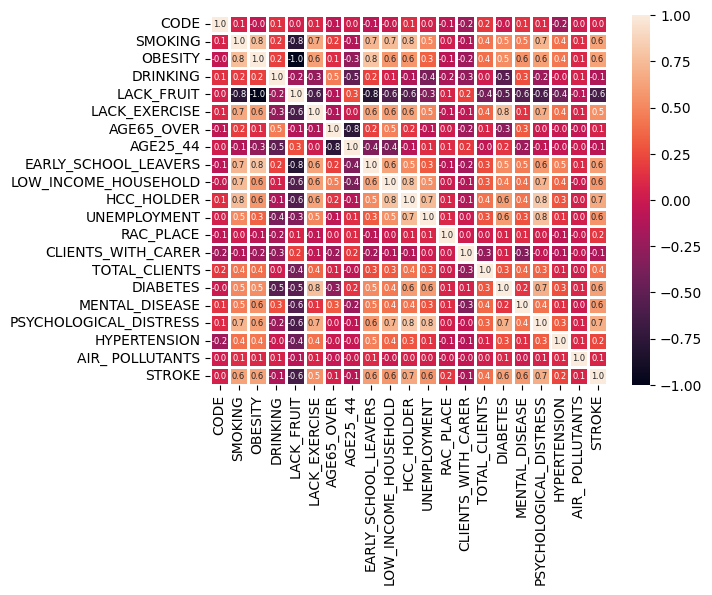

In [55]:
corrMatrix = data.corr() 
sns.heatmap(corrMatrix, annot=True, fmt=".1f",linewidth=1, annot_kws={"size":6}) 
plt.show() 

In [49]:
X = data.drop(['CODE','STROKE'],axis=1) 
Y = data['STROKE'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 
lin_reg_model = LinearRegression() 
lin_reg_model.fit(X_train,Y_train) 

print("coef:", lin_reg_model.coef_)
print('')

# training 
training_data_prediction = lin_reg_model.predict(X_train) 
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

mean_squared_error = metrics.mean_squared_error(Y_train, training_data_prediction)
print("Mean squared Error - Training : ", mean_squared_error) 

print('')

# testing
Y_pred = lin_reg_model.predict(X_test) 
test_error_score2 = metrics.r2_score(Y_test, Y_pred) 
mean_squared_error2 = metrics.mean_squared_error(Y_test, Y_pred)

print("R squared Error - Test: ", test_error_score2) 
print("Mean squared Error - Test : ", mean_squared_error2) 




coef: [ 5.81869180e-03 -1.41600259e-04 -6.87037258e-03  1.41600259e-04
 -1.43696113e-03 -3.31605587e-03 -2.48322527e-03  4.94967357e-03
 -1.23576276e-04  1.15687962e-02  1.06221056e-03  2.62596288e-04
  3.22392946e-04  9.43787010e-04  2.38848900e-02  2.76498189e-02
  3.77474016e-03 -9.85449004e-03  2.39670275e-06]

R squared Error - Training :  0.6895008200322782
Mean squared Error - Training :  0.012161107367275787

R squared Error - Test:  0.6922759754320611
Mean squared Error - Test :  0.011435623813216238


In [58]:
np.random.seed(0)

#print(cvd)
# creating a dataframe with the feature variables
df = pd.DataFrame(data)
# Viewing the top 5 rows
df.head()

# Creating the test and train data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75
# view the top 5 rows
df.head()

# creating dataframes with test rows and training rows
train, test = df[df['is_train']==True], df[df['is_train']==False]
# sHow the number of observation for the test and training dataframes
print('The number of observations in the training data:', len(train))
print('The number of observations in the testing data:', len(test))


# Create a list of the feature column's names
features = df.columns[1:20]


# setting target
y = df.columns[20:21]
# viewing the target
y

# creating a random forest regressor
reg = RandomForestRegressor()
# training the regressor
reg.fit(train[features], train[y].values.ravel())

# Applying the trained regressor to the test
reg.predict(test[features])

# Viewing the ACTUAL Stroke for the first 5 observation
test[y].head()

# Viewing the PREDICTED Stroke for the first 5 observations
preds = reg.predict(test[features])
preds[0:5]

# Calculate MSE
mse = mean_squared_error(test[y], preds)
# View MSE 
mse 


The number of observations in the training data: 836
The number of observations in the testing data: 270


0.01264826451180661

In [59]:
test[y].head()

,STROKE
7,0.896892
8,0.791619
10,0.826713
13,0.691890
17,0.889546


In [60]:
preds[0:5]

array([0.98000462, 0.77266283, 0.76321395, 0.70874683, 0.82887058])